In [2]:
from commpy.channels import awgn
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
import pyMRI.pymri as pymri
from pyMRI.utils import RMSE

In [3]:
metabolites = pymri.METABOLITES
met_i = 1

t0, tn, dt, B0 = pymri.setup_sim_t(0.0, 1.0, 2048, 3.0)

ws, t2s, M_0s = pymri.unpack_metabolites(metabolites, B0)
ws, t2s, M_0s = ws, t2s, M_0s

spins_phi = np.zeros_like(M_0s)

rcond = 1e-7 
zero_filtering = 1e-14

print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")


All frequencies are captured by the sampling rate.


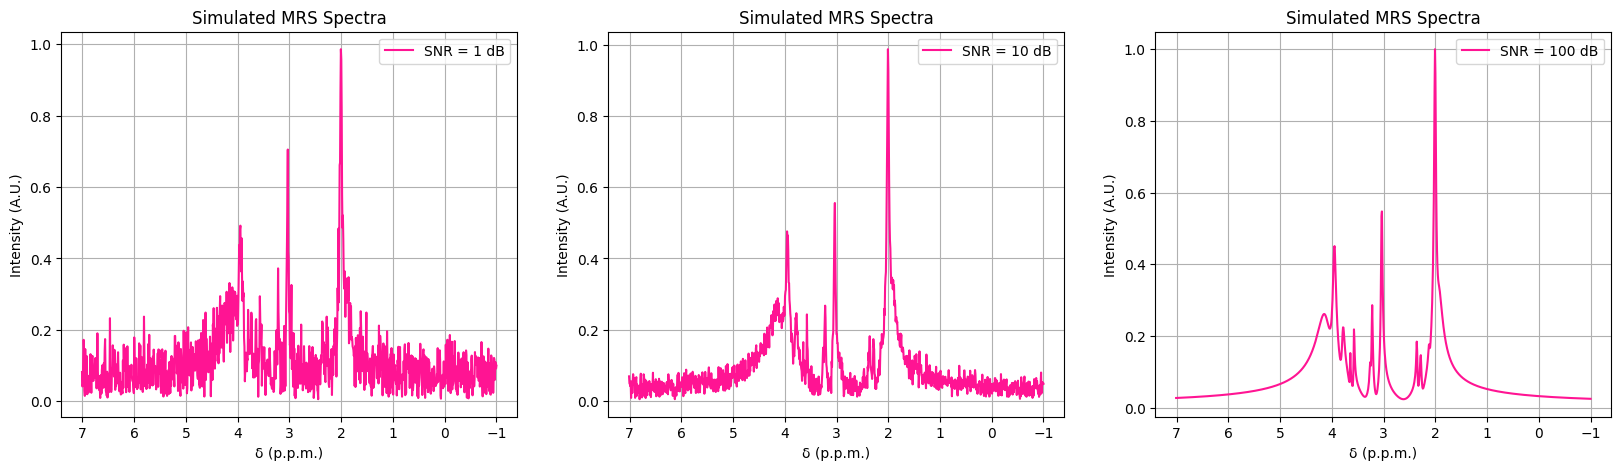

In [4]:
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay( t0, tn, dt, pop, np.array([]) )
freqs, sig_fft = pymri.fourier_spectrum( sig, dt, B0 )

sig_fft = sig_fft/np.nanmax(sig_fft)

c_sig = awgn(sig_fft, 1.0)
# c_freqs, c_sig_fft = pymri.fourier_spectrum( c_sig, dt, B0 )

plt.figure(figsize=(20, 5))
plt.subplot(131)
pymri.plot_chem_shifts( freqs, awgn(sig_fft, 1.0), 1.0, label="SNR = 1 dB" )
plt.legend()

plt.subplot(132)
pymri.plot_chem_shifts( freqs, awgn(sig_fft, 10.0), 1.0, label="SNR = 10 dB" )
plt.legend()

plt.subplot(133)
pymri.plot_chem_shifts( freqs, awgn(sig_fft, 100.0), 1.0, label="SNR = 100 dB")
plt.legend()

## Teste de Fase



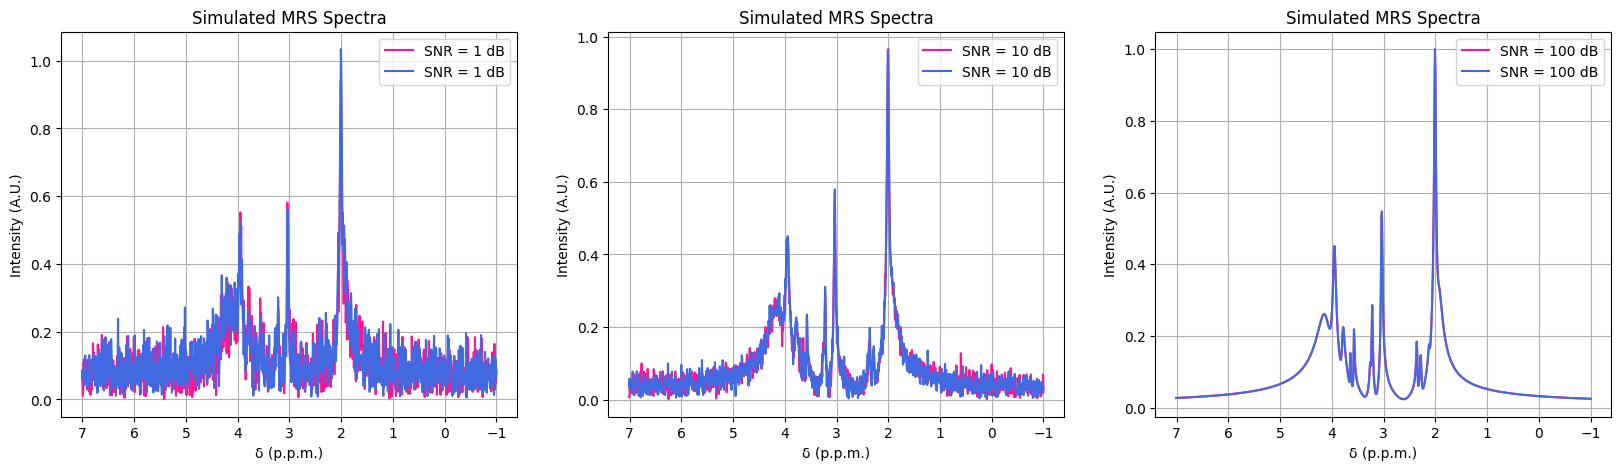

In [6]:
spins_phi_2 = np.ones_like(spins_phi)*(np.pi/2)

pop_2 = pymri.population(ws, t2s, M_0s, spins_phi_2)

sig_2, t = pymri.population_transverse_decay( t0, tn, dt, pop_2, np.array([]) )
freqs, sig_fft_2 = pymri.fourier_spectrum( sig_2, dt, B0 )

sig_fft_2 = sig_fft/np.nanmax(sig_fft)

c_sig = awgn(sig_fft, 1.0)
# c_freqs, c_sig_fft = pymri.fourier_spectrum( c_sig, dt, B0 )

plt.figure(figsize=(20, 5))
plt.subplot(131)
pymri.plot_chem_shifts( freqs, awgn(sig_fft, 1.0), 1.0, label="SNR = 1 dB")
pymri.plot_chem_shifts( freqs, awgn(sig_fft_2, 1.0), 1.0, label="SNR = 1 dB", c = "royalblue")
plt.legend()

plt.subplot(132)
pymri.plot_chem_shifts( freqs, awgn(sig_fft, 10.0), 1.0, label="SNR = 10 dB")
pymri.plot_chem_shifts( freqs, awgn(sig_fft_2, 10.0), 1.0, label="SNR = 10 dB", c = "royalblue")
plt.legend()

plt.subplot(133)
pymri.plot_chem_shifts( freqs, awgn(sig_fft, 100.0), 1.0, label="SNR = 100 dB")
pymri.plot_chem_shifts( freqs, awgn(sig_fft_2, 100.0), 1.0, label="SNR = 100 dB", c = "royalblue")
plt.legend()

É possível verificar que a fase não altera a cara do ruído.